# Fully Connected Neural Networks 

This tutorial demonstrates the usage of fully connected neural-networks to classify 2-dimensional synthetic data. We implement the network using Keras and TensorFlow. Keras and TensorFlow are powerful frameworks that allow you to build many  deep-learning-based applications.

The goals of this tutorial are:
  - Introduce Keras and TensorFlow to implement fully connected neural network.
  - Illustrate the non-linear decision rules that multi-layer neural networks can achieve.
  
      
## Importing Python Libraries

In [53]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [54]:
# ! ls gdrive/MyDrive/ENEL645-tutorial/ENEL645-master/

In [55]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

#physical_devices = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

from tensorflow.keras.utils import to_categorical # Function to convert labels to one-hot encoding
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Dense, Activation,Input 
from tensorflow.keras.optimizers import SGD

import sys
## Adding dataset_utils to the system path so we can import it
MY_UTILS_PATH = 'D:/code/ENEL645/Modules/'
if not MY_UTILS_PATH in sys.path:
    sys.path.append(MY_UTILS_PATH)
import dataset_utils

## Loading and Displaying a Synthetic 2D Dataset

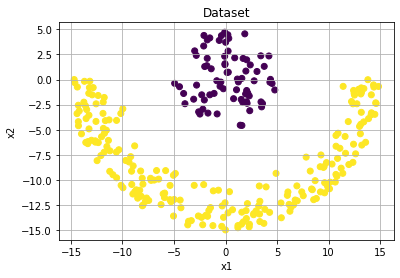

In [56]:
#Generating a synthetic dataset with four classes
nsamples = 300

#data = dataset_utils.corners(N = nsamples,scale = 0.5,gapwidth = 3,cornerwidth = 4) # linear dataset
data = dataset_utils.crescent_full_moon(N = nsamples,r1 = 5,r2 = 10,r3 = 15) #non-linear dataset

# Separating features (X) and labels (Y)
Y = data[:,-1].astype(int) # Labels
X = data[:,:-1] # Features

#Number of classes
k = np.unique(Y).size

colors = np.array(['r','y','b','g'])
#Displaying the dataset
plt.scatter(X[:,0],X[:,1],c=Y)

plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.title("Dataset")
plt.show()

## Train, Validation and Test Sets Split

In [57]:
# First we will shuffle the samples
indexes = np.arange(X.shape[0])
np.random.shuffle(indexes)
X = X[indexes,:]
Y = Y[indexes]

# Then, we split our data into train/val/test sets
train_split = np.int(0.5*Y.size)
val_split = np.int(0.75*Y.size)

X_train = X[:train_split,:]
Y_train = Y[:train_split]

X_val = X[train_split:val_split,:]
Y_val = Y[train_split:val_split]

X_test = X[val_split:,:]
Y_test = Y[val_split:]

C:\Users\TAHSIN~1\AppData\Local\Temp/ipykernel_9816/2020166094.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  train_split = np.int(0.5*Y.size)
C:\Users\TAHSIN~1\AppData\Local\Temp/ipykernel_9816/2020166094.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release not

## Data Normalization

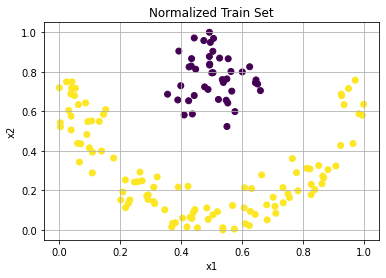

In [58]:
# min-max data normalization
x_train_min = X_train.min(axis = 0, keepdims = True)
x_train_max = X_train.max(axis = 0, keepdims = True)

X_train = (X_train - x_train_min)/(x_train_max - x_train_min)
X_val = (X_val - x_train_min)/(x_train_max - x_train_min)
X_test = (X_test - x_train_min)/(x_train_max - x_train_min)


#####################################################################################
#Activity suggestion:
# Change the min-max normalization above by standardization ((X - mean)/(std))
####################################################################################


#Displaying the normalized train set
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.title("Normalized Train Set")
plt.show()

## Representing Labels using one-hot-ecoding

In [59]:
Y_oh_train = to_categorical(Y_train, k) 
Y_oh_val = to_categorical(Y_val, k) 
Y_oh_test = to_categorical(Y_test, k)
# Displaying the 5 first elemnts
print('Y_train[:5]:')
print(Y_train[:5])
print('\nY_oh_train[:5]=')
print(Y_oh_train[:5])

Y_train[:5]:
[1 0 0 1 1]

Y_oh_train[:5]=
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


## Defining a Fully Connected Neural Network with Keras

In [60]:
def my_model(k,learning_rate = 0.15):
    inputs = Input(shape=(2,))
    l1 = Dense(100, activation='relu')(inputs)
    l2 = Dense(50, activation='relu')(l1)
    l3 = Dense(20, activation='relu')(l2)
    out1 = Dense(k, activation='softmax')(l3)
    model = Model(inputs=inputs, outputs=out1)
    sgd = SGD(lr=learning_rate)
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics = ["accuracy"]) 
    return model

In [61]:
model = my_model(k)
print(model.summary())

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_20 (Dense)            (None, 100)               300       
                                                                 
 dense_21 (Dense)            (None, 50)                5050      
                                                                 
 dense_22 (Dense)            (None, 20)                1020      
                                                                 
 dense_23 (Dense)            (None, 2)                 42        
                                                                 
Total params: 6,412
Trainable params: 6,412
Non-trainable params: 0
_________________________________________________________________
None


## Training the Model

In [62]:
batch_size = train_split
nb_epoch = 500
n = X_train.shape[0] # number of training examples
history = model.fit(X_train, Y_oh_train, validation_data=(X_val,Y_oh_val), \
                    batch_size=batch_size, epochs=nb_epoch,verbose=0)

## Prininting Loss and estimated weights (Ws)

Final loss (cross-entropy and accuracy): [0.007163456175476313, 1.0]

Layer 0
Bias:
 [ 1.16527364e-01 -1.12874456e-01  5.87520450e-02 -5.60207330e-02
  0.00000000e+00 -1.66888058e-01 -3.96032110e-02  4.65493184e-03
 -2.93699317e-02  3.07298768e-02  3.16536985e-02 -4.59621325e-02
 -1.15578651e-01  7.14401603e-02  5.32743870e-05  0.00000000e+00
  1.49507280e-02  0.00000000e+00  2.11766493e-02 -1.26611041e-02
  0.00000000e+00 -7.93360099e-02  3.17580283e-01 -1.42800203e-02
  0.00000000e+00  0.00000000e+00  5.36853671e-02  2.91569792e-02
  2.94068512e-02 -1.75983291e-02 -4.42868005e-03  2.84832865e-01
  0.00000000e+00 -1.02334442e-02 -1.00674272e-01  0.00000000e+00
  3.16187590e-01 -1.46227162e-02 -8.01355243e-02  1.14884906e-01
  3.60590033e-02  3.28384899e-02  0.00000000e+00  0.00000000e+00
 -2.21268479e-02  7.12596327e-02  9.10040066e-02  5.60348369e-02
 -2.60020187e-03  1.73450951e-02  2.01611388e-02  0.00000000e+00
 -8.16379935e-02 -6.24033399e-02  1.74991298e-03  0.00000000e+00
  0.0

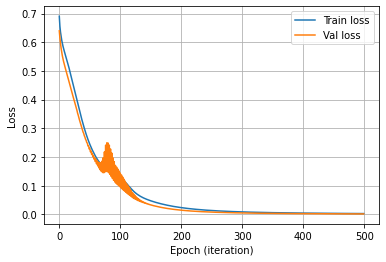

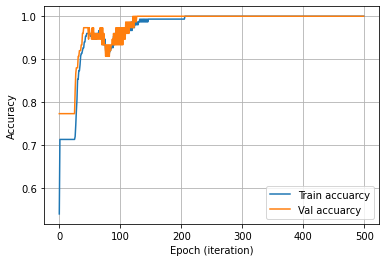

In [63]:
loss = model.evaluate(X_test, Y_oh_test, verbose=0)
print('Final loss (cross-entropy and accuracy):',loss)
print()
W = model.get_weights()
for ii in range(len(W)//2):
    print("Layer %d" %ii)
    print('Bias:\n', W[2*ii + 1])
    print('W:\n', W[2*ii])
    print()

plt.plot(history.history['loss'], label = "Train loss")
plt.plot(history.history['val_loss'], label = "Val loss")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


plt.plot(history.history['accuracy'], label = "Train accuarcy")
plt.plot(history.history['val_accuracy'], label = "Val accuarcy")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

## Classifier Decision Boundary

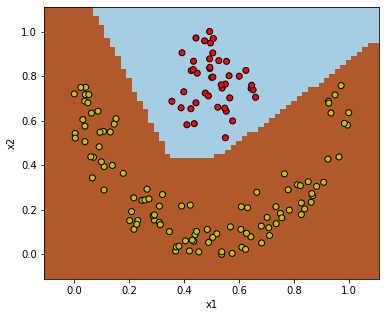

In [64]:
h = .02  # step size in the mesh
slack = 0.1
# Calcula a grade para o espaço de atributos

x_min, x_max = X_train.min(axis=0) - slack, X_train.max(axis=0) + slack
xx, yy = np.meshgrid(np.arange(x_min[0], x_max[0], h), np.arange(x_min[1], x_max[1], h))
X_grid = np.c_[xx.ravel(), yy.ravel()]

# Prediction of all samples in our grid
Z = model.predict(X_grid).argmax(axis = 1)
Z = Z.reshape(xx.shape)

# Display decision boundary
plt.figure(1, figsize=(6, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Display training samples
plt.scatter(X_train[:,0], X_train[:,1], c=colors[Y_train], edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## Suggested activities
- Repeat the example without normalizing the data or using standardization (i.e., subtract from the mean and divide by the standard-deviation);
- Experiment with other datasets
- Change the neural network architecture
- ...